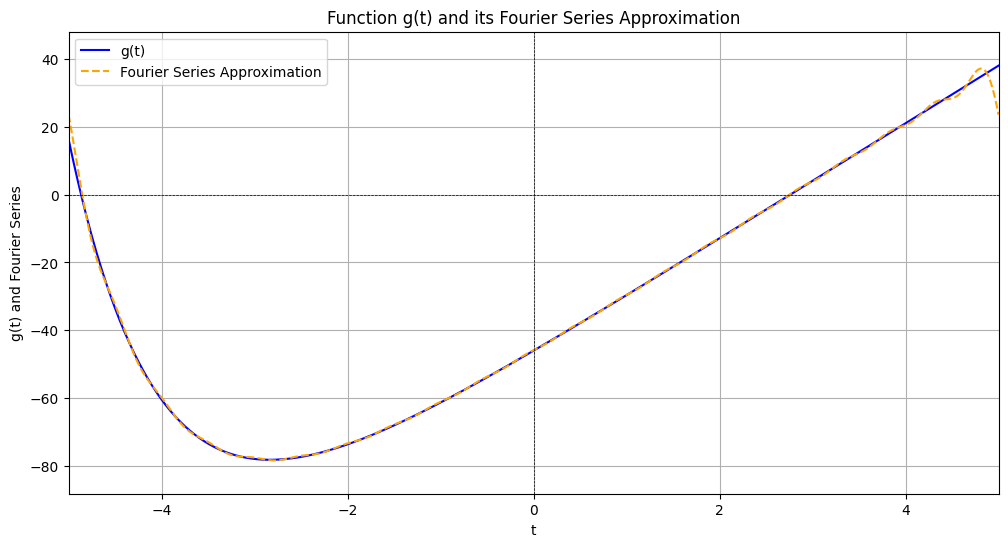

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  

# Define the function g(t)  
def g(t):  
    return np.exp(-t) + 17 * t - 47  

# Define the Fourier series coefficients  
L = 5  # Length of the interval  
n_terms = 20  # Number of terms in the Fourier series  

# Calculate coefficients  
a0 = (1 / (2 * L)) * np.trapz([g(t) for t in np.linspace(-L, L, 1000)], dx=(2 * L / 1000))  
am = []  
bm = []  

for m in range(1, n_terms + 1):  
    am.append((1 / L) * np.trapz([g(t) * np.cos(m * np.pi * t / L) for t in np.linspace(-L, L, 1000)], dx=(2 * L / 1000)))  
    bm.append((1 / L) * np.trapz([g(t) * np.sin(m * np.pi * t / L) for t in np.linspace(-L, L, 1000)], dx=(2 * L / 1000)))  

# Fourier series approximation  
def fourier_series(t, n_terms):  
    series = a0  
    for m in range(1, n_terms + 1):  
        series += am[m - 1] * np.cos(m * np.pi * t / L) + bm[m - 1] * np.sin(m * np.pi * t / L)  
    return series  

# Time values for plotting  
t_values = np.linspace(-L, L, 1000)  
g_values = g(t_values)  
fourier_values = fourier_series(t_values, n_terms)  

# Plotting  
plt.figure(figsize=(12, 6))  
plt.plot(t_values, g_values, label='g(t)', color='blue')  
plt.plot(t_values, fourier_values, label='Fourier Series Approximation', color='orange', linestyle='--')  
plt.title('Function g(t) and its Fourier Series Approximation')  
plt.xlabel('t')  
plt.ylabel('g(t) and Fourier Series')  
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  
plt.legend()  
plt.grid()  
plt.xlim(-L, L)  
plt.ylim(min(g_values) - 10, max(g_values) + 10)  
plt.show()